------------------------------- NATURAL DISASTER PROJECT-------------------------------------

INTRODUCTION: 

- This project analyzes a Natural Disaster dataset containing information on disasters such as floods, cyclones, and earthquakes, including deaths, injuries, economic losses,   
   relief funds, and severity.
- The goal is to clean the dataset, handle missing or inconsistent data, and perform Exploratory Data Analysis (EDA) using various visualizations.
- Through plots like bar charts, heatmaps, histograms, pie charts, and violin plots, we aim to uncover patterns, trends, and correlations to better understand the impact of 
  natural disasters.

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv( 'naturaldisaster.csv')
df.head(25)

,Date,Disaster_Type,Location,Deaths,Injured,Economic_Loss_USD,Relief_Fund_USD,Severity_Scale
0,01-01-2023,NaN,Nepal,20.0,50,50000.0,missing,2
1,02-01-2023,Wildfire,India,0.0,0,NaN,missing,4
2,03-01-2023,Drought,Australia,20.0,unknown,NaN,5000,high
3,04-01-2023,NaN,Nepal,0.0,50,150000.0,missing,high
4,05-01-2023,Cyclone,Brazil,NaN,NaN,10000.0,20000,5
5,06-01-2023,Drought,Brazil,NaN,unknown,10000.0,20000,1
6,07-01-2023,Drought,Brazil,20.0,0,NaN,5000,4
7,08-01-2023,NaN,Brazil,-1.0,50,150000.0,missing,NaN
8,09-01-2023,Earthquake,Brazil,10.0,50,NaN,missing,high
9,10-01-2023,Cyclone,Nepal,0.0,50,250000.0,missing,3


In [139]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               200 non-null    object 
 1   Disaster_Type      140 non-null    object 
 2   Location           150 non-null    object 
 3   Deaths             138 non-null    float64
 4   Injured            164 non-null    object 
 5   Economic_Loss_USD  143 non-null    float64
 6   Relief_Fund_USD    162 non-null    object 
 7   Severity_Scale     170 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.6+ KB


In [140]:
df.columns

Index(['Date', 'Disaster_Type', 'Location', 'Deaths', 'Injured',
       'Economic_Loss_USD', 'Relief_Fund_USD', 'Severity_Scale'],
      dtype='object')

1. FINDING THE UNIQUE VALUES

In [141]:
for col in df.columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Unique values in Date:
['01-01-2023' '02-01-2023' '03-01-2023' '04-01-2023' '05-01-2023'
 '06-01-2023' '07-01-2023' '08-01-2023' '09-01-2023' '10-01-2023'
 '11-01-2023' '12-01-2023' '13-01-2023' '14-01-2023' '15-01-2023'
 '16-01-2023' '17-01-2023' '18-01-2023' '19-01-2023' '20-01-2023'
 '21-01-2023' '22-01-2023' '23-01-2023' '24-01-2023' '25-01-2023'
 '26-01-2023' '27-01-2023' '28-01-2023' '29-01-2023' '30-01-2023'
 '31-01-2023' '01-02-2023' '02-02-2023' '03-02-2023' '04-02-2023'
 '05-02-2023' '06-02-2023' '07-02-2023' '08-02-2023' '09-02-2023'
 '10-02-2023' '11-02-2023' '12-02-2023' '13-02-2023' '14-02-2023'
 '15-02-2023' '16-02-2023' '17-02-2023' '18-02-2023' '19-02-2023'
 '20-02-2023' '21-02-2023' '22-02-2023' '23-02-2023' '24-02-2023'
 '25-02-2023' '26-02-2023' '27-02-2023' '28-02-2023' '01-03-2023'
 '02-03-2023' '03-03-2023' '04-03-2023' '05-03-2023' '06-03-2023'
 '07-03-2023' '08-03-2023' '09-03-2023' '10-03-2023' '11-03-2023'
 '12-03-2023' '13-03-2023' '14-03-2023' '15-03-2023'

2. THE COUNT OF THE UNIQUE VALUES FROM ALL THE COLUMNS

In [142]:
df.nunique()


Date                 200
Disaster_Type          5
Location               6
Deaths                 5
Injured                5
Economic_Loss_USD      4
Relief_Fund_USD        4
Severity_Scale         6
dtype: int64

2. CLEANING AND VALIDATING THE DATE COLUMN

In [143]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

,Date,Disaster_Type,Location,Deaths,Injured,Economic_Loss_USD,Relief_Fund_USD,Severity_Scale
0,2023-01-01,NaN,Nepal,20.0,50,50000.0,missing,2
1,2023-02-01,Wildfire,India,0.0,0,NaN,missing,4
2,2023-03-01,Drought,Australia,20.0,unknown,NaN,5000,high
3,2023-04-01,NaN,Nepal,0.0,50,150000.0,missing,high
4,2023-05-01,Cyclone,Brazil,NaN,NaN,10000.0,20000,5
...,...,...,...,...,...,...,...,...
195,NaT,NaN,Nepal,10.0,unknown,50000.0,50000,2
196,NaT,Wildfire,Japan,20.0,unknown,150000.0,missing,NaN
197,NaT,Earthquake,NaN,5.0,15,250000.0,missing,4
198,NaT,Earthquake,Australia,10.0,NaN,NaN,missing,1



 - Original dataset had dates as strings, which are not usable for time-based analysis.

- Some dates might have been missing or invalid, which would have caused errors in plotting trends over time.

- After cleaning, we can now analyze disasters chronologically and group by year/month.

3. STANDARDIZING THE DISASTER COLUMN BY CLEANING IT

In [144]:
df['Disaster_Type'] = df['Disaster_Type'].str.title()

- Some rows had missing location information, filling "Unknown" allows analysis without losing rows.

- Standardization ensures “india” and “India” are counted as the same location.

- allows correct grouping by country.

4. CLEANING OF THE COLUMN NAMED LOCATION

In [145]:


df['Location'] = df['Location'].str.title()


In [146]:
df

,Date,Disaster_Type,Location,Deaths,Injured,Economic_Loss_USD,Relief_Fund_USD,Severity_Scale
0,2023-01-01,NaN,Nepal,20.0,50,50000.0,missing,2
1,2023-02-01,Wildfire,India,0.0,0,NaN,missing,4
2,2023-03-01,Drought,Australia,20.0,unknown,NaN,5000,high
3,2023-04-01,NaN,Nepal,0.0,50,150000.0,missing,high
4,2023-05-01,Cyclone,Brazil,NaN,NaN,10000.0,20000,5
...,...,...,...,...,...,...,...,...
195,NaT,NaN,Nepal,10.0,unknown,50000.0,50000,2
196,NaT,Wildfire,Japan,20.0,unknown,150000.0,missing,NaN
197,NaT,Earthquake,NaN,5.0,15,250000.0,missing,4
198,NaT,Earthquake,Australia,10.0,NaN,NaN,missing,1


- Replaces empty strings or blanks with NaN using pandas.
- Fills missing values with "Unknown".
- Standardizes capitalization

5. CHANGES AND CLENANING ,CONVERTING THE DATA INTO NUMERIC VALUE

In [147]:

df['Injured'] = pd.to_numeric(df['Injured'], errors='coerce')
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Economic_Loss_USD'] = pd.to_numeric(df['Economic_Loss_USD'], errors='coerce')
df['Relief_Fund_USD'] = pd.to_numeric(df['Relief_Fund_USD'], errors='coerce')
df['Severity_Scale'] = pd.to_numeric(df['Severity_Scale'], errors='coerce')



- IT converts the values into numeric values.



6. REPLACING THE NULL AND INVALID  VALUES .

In [148]:
df['Injured'].replace(["unknown", "Unknown"], pd.NA, inplace=True)
df['Economic_Loss_USD'].replace(["NA", "N/A"], pd.NA, inplace=True)
df['Relief_Fund_USD'].replace(["missing", "Missing"], pd.NA, inplace=True)
df['Severity_Scale'].replace("high", pd.NA, inplace=True)
df['Deaths'].replace(["N/A", "NA", -1], pd.NA, inplace=True)
df['Location'].replace("", pd.NA, inplace=True)
df['Location'].replace(" ", pd.NA, inplace=True)

- Original dataset had "unknown" entries in the Injured column.

- These strings prevent numeric analysis (like sum, mean, or plotting).

- Replacing with pd.NA marks them as missing values, making it possible to handle them later (fill with 0, median, or leave as missing).

7. FILLING THE VALUES WITH HELP OF MEDIAN AND MODE

In [149]:
df['Deaths'].fillna(0, inplace=True)
df['Location'].fillna("Unknown", inplace=True)
df['Injured'].fillna(0, inplace=True)
df['Economic_Loss_USD'].fillna(df['Economic_Loss_USD'].median(), inplace=True)
df['Severity_Scale'].fillna(df['Severity_Scale'].mode()[0], inplace=True)

- After replacing invalid entries with pd.NA, there were missing values in Deaths.

- Filling missing values with 0 assumes that no deaths were reported for those records.

8. ENSURING THAT THE SEVERITY IS BETWEEN 1 TO 5

In [150]:

df['Severity_Scale'] = df['Severity_Scale'].clip(1, 5)

- Severity should be numeric 1–5, original dataset had invalid strings.

- Filling missing with mode ensures analysis can continue without biasing data too much.

9. RENAMING MULTIPLE COLUMNS

In [151]:

df.rename(columns={
    'Disaster_Type': 'Disaster',
    'Economic_Loss_USD': 'Economic_Loss',
    'Relief_Fund_USD': 'Relief_Fund'
}, inplace=True)


In [152]:
df.columns

Index(['Date', 'Disaster', 'Location', 'Deaths', 'Injured', 'Economic_Loss',
       'Relief_Fund', 'Severity_Scale'],
      dtype='object')

- the columns with the complicated names will be replaced

---------------------------------------------------------GRAPHS----------------------------------------------------------------------------------

1. PLOT THE TOTAL DEATHS PER DISASTER .

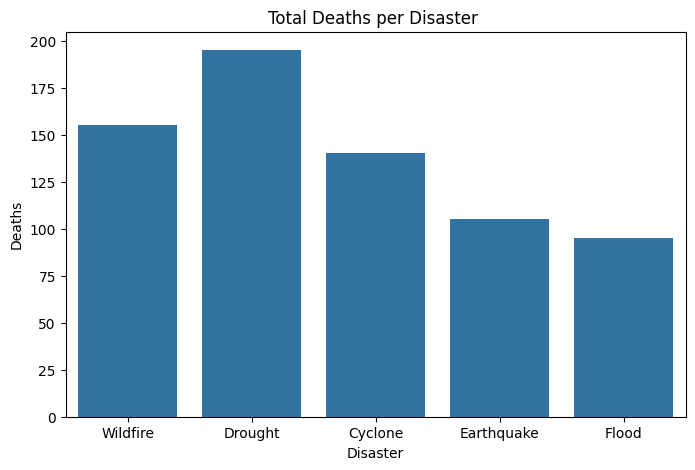

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Disaster', y='Deaths', estimator=sum,errorbar=None)
plt.title("Total Deaths per Disaster ")
plt.show()


- drought has the highest total deaths.
- flood has the least total deaths.
- Bar plot helps compare numeric values across categories.

2. PLOT THE COUNT OD DISASTERS IN EACH LOCATION

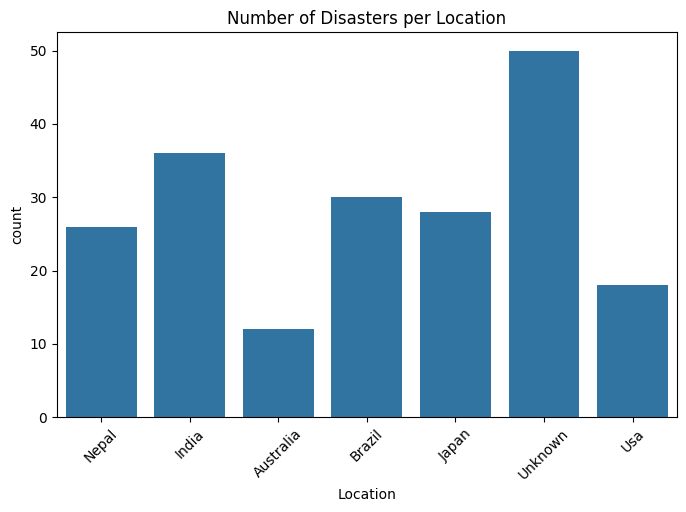

In [154]:


plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Location')
plt.title("Number of Disasters per Location")
plt.xticks(rotation=45)
plt.show()

- India and place which is unknown  have most disaster records.
- Australia has the least disaster records.
- Countplot is good for categorical frequency analysis.

3. PLOT THE DISTRIBUTION OF ECONOMIC LOSSES OCCURED ACCROSS THE DISASTERS.

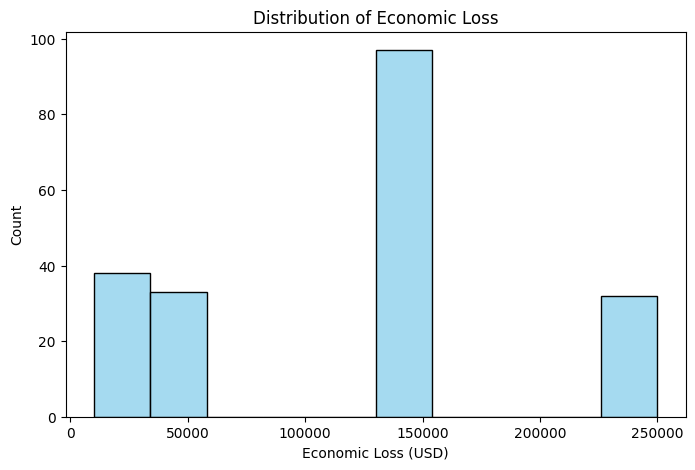

In [155]:


plt.figure(figsize=(8,5))
sns.histplot(df['Economic_Loss'], bins=10, color='skyblue')
plt.title("Distribution of Economic Loss")
plt.xlabel("Economic Loss (USD)")
plt.show()


- Economic loss distribution is multimodal, with the main peak around USD 150,000.

- Smaller clusters occur at low to medium losses (0–50,000) and a minor peak at USD 250,000.

- Losses between USD 50,000–100,000 are rare.

- Overall, there are two main groups: low-loss and high-loss disasters.

- Histogram shows distribution of numeric data.

4. PLOT THE CORRELATION BETWEEN THE MULTIPLE NUMERIC COLUMNS.

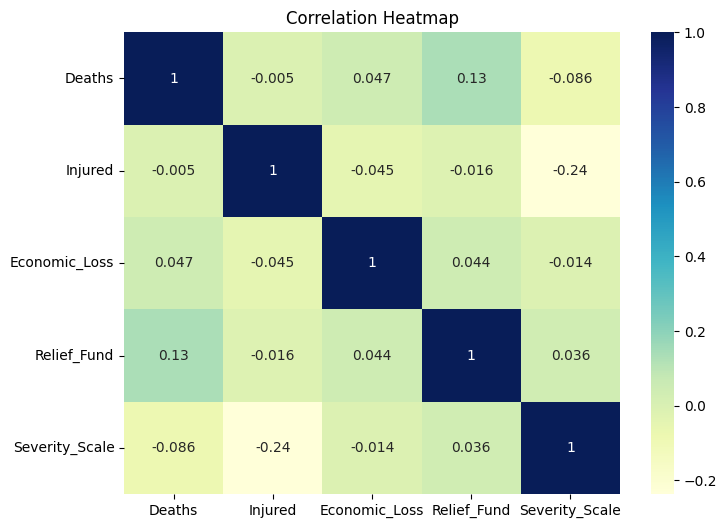

In [156]:

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.yticks(rotation=360)
plt.show()





-   most variables have very weak correlations with each other (values close to 0).

- Relief_Fund has a slight positive correlation with Deaths (0.13).

- Severity_Scale has a small negative correlation with Injured (-0.24).

- Overall, no strong linear relationships are present in this dataset.



5. PLOT THE PROPERTION OF DISASTERS.

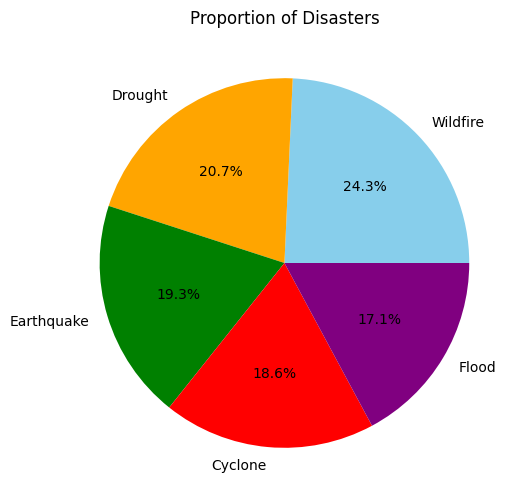

In [157]:
df['Disaster'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6), colors=['skyblue','orange','green','red','purple'])
plt.title("Proportion of Disasters")
plt.ylabel("")
plt.show()


- wildfire froms the largest proportion.
- flood forms the smallest proportion.
- Pie charts show percentage distribution of categories.

6. PLOT THE TRENDS OF DEATH OVER THE TIME

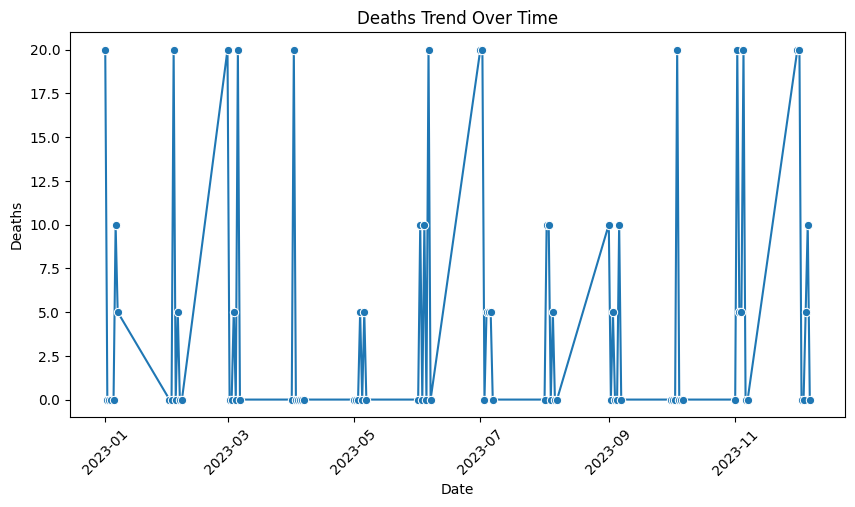

In [158]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Deaths', marker='o')
plt.title("Deaths Trend Over Time")
plt.xticks(rotation=45)
plt.show()


- we can observe that the deaths caused fluctuate over the time.
- then too deaths from 2023-1 to 2023-4 are more when seen.
- Line plots are useful for time series or trend analysis.

7. PLOT THE INJURED AND DEATHS PER DISASTER.

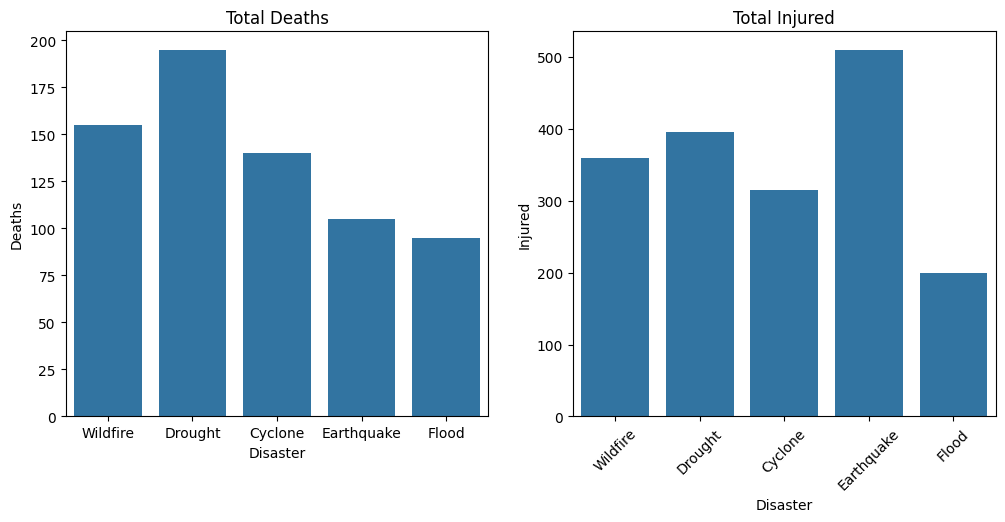

In [159]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.barplot(data=df, x='Disaster', y='Deaths', estimator=sum, ax=axes[0],errorbar=None)
axes[0].set_title("Total Deaths")
sns.barplot(data=df, x='Disaster', y='Injured', estimator=sum, ax=axes[1],errorbar=None)
axes[1].set_title("Total Injured")
plt.xticks(rotation=45)
plt.show()


- many of the deaths are caused by the drought.
- many ppl got injured bcz of earthquake.
- Subplots let you compare multiple metrics side by side.

8. PLOT THE ECONOMIC LOSS DISTRIBUTION BY THE DISASTERS.

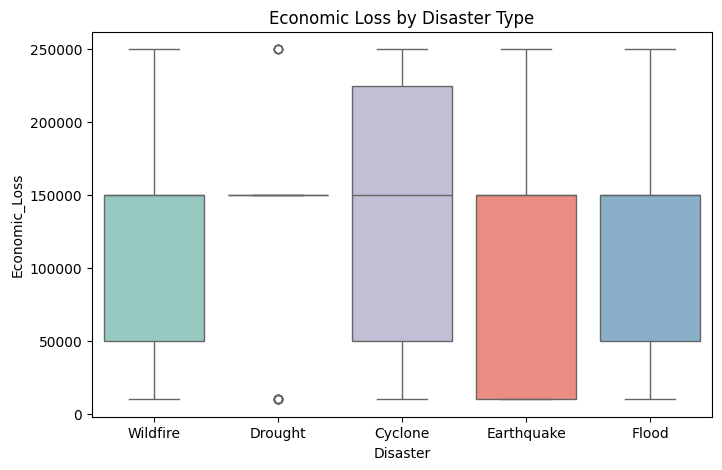

In [160]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Disaster', y='Economic_Loss', palette='Set3')
plt.title("Economic Loss by Disaster Type")
plt.show()


 - Highest Loss: Cyclone Disaster has the highest median economic loss.
 - Lowest Loss: Drought has the lowest median economic loss.
 - Outliers: Drought, Cyclone Disaster, and Flood show outliers with     
    exceptionally high losses.


9. PLOT THE RELATIONSHIPS BETWWEN NUMERIC COLUMNS

<Figure size 700x500 with 0 Axes>

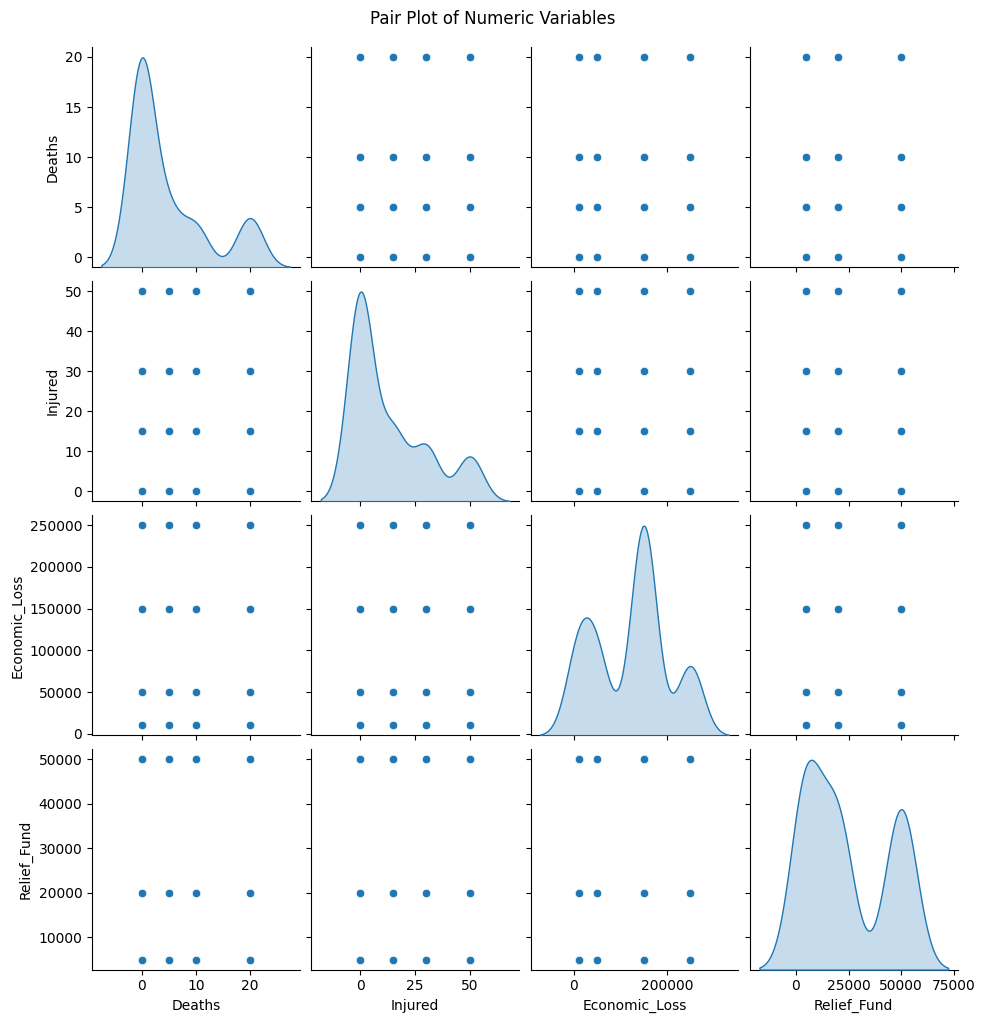

In [161]:
plt.figure(figsize=(7,5))
sns.pairplot(df[['Deaths','Injured','Economic_Loss','Relief_Fund']], kind='scatter', diag_kind='kde')
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()


- Deaths and Injured are highly skewed right (mostly near zero).
-  Economic Loss is roughly symmetric and unimodal.
- Relief Fund is bimodal (two peaks).
-  Crucially, there are no strong correlations between any of the variables (Deaths, Injured, Economic Loss, and Relief Fund).


10. PLOT THE SEVERITY DISTRIBUTION ACCROSS THE DISASTER.

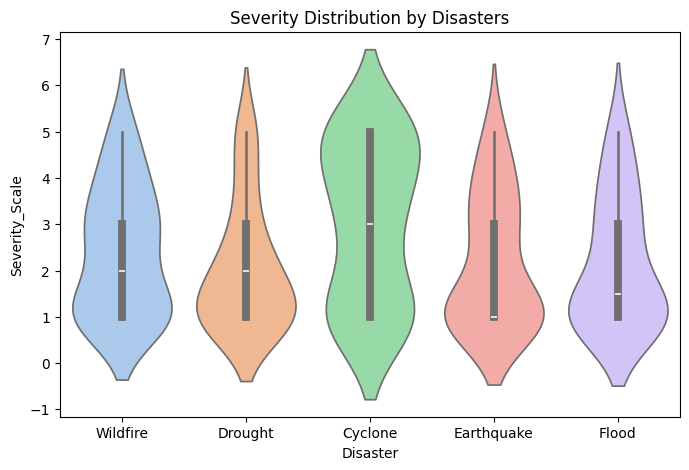

In [162]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Disaster', y='Severity_Scale', palette='pastel')
plt.title("Severity Distribution by Disasters")
plt.show()


-  Cyclone Disaster has the highest median severity and the widest distribution (most data density) at higher severity levels (around 3 to 7), indicating it is generally the 
     most severe.
-  Drought has the narrowest distribution, with its severity highly concentrated around the median (around 3), suggesting it is the most consistent in severity but less likely  
   to reach the highest scores.
-  Wildfire, Earthquake, and Flood have similar and relatively broad distributions covering a wide range of severity, generally centered between severity scores of 1 and 4.
-  All disasters show data distributed across the majority of the severity scale (from approximately 0 to 7).


--------------------------------------------------------------------------CONCLUSION----------------------------------------------------------------------------

- Dataset was cleaned and standardized, ready for analysis.

- Visualizations revealed trends, distributions, and correlations between deaths, injuries, economic loss, and relief funds.

- Drought  caused the highest impact, while severity varies across disaster types.

-  All disasters show data distributed across the majority of the severity scale (from approximately 0 to 7).

- Cyclone Disaster has the highest median severity and the widest distribution.

- there are no strong correlations between any of the variables (Deaths, Injured, Economic Loss, and Relief Fund).

